In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')


In [4]:
tc=pd.read_csv('Telcom-Customer-Churn.csv')
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Target:

Churn — Whether the customer churned or not (Yes, No)

Numeric Features:

    Tenure — Number of months the customer has been with the company
    MonthlyCharges — The monthly amount charged to the customer
    TotalCharges — The total amount charged to the customer

Categorical Features:

       CustomerID
       Gender — M/F
       sorCitizen — Whether the customer is a senior citizen or not (1, 0)
       Partner — Whether customer has a partner or not (Yes, No)
       ependents — Whether customer has dependents or not (Yes, No)
       PhoneService — Whether the customer has a phone service or not (Yes, No)
       MulitpleLines — Whether the customer has multiple lines or not (Yes, No, No Phone Service)
       InternetService — Customer’s internet service type (DSL, Fiber Optic, None)
       OnlineSecurity — Whether the customer has Online Security add-on (Yes, No, No Internet Service)
       OnlineBackup — Whether the customer has Online Backup add-on (Yes, No, No Internet Service)
       DeviceProtection — Whether the customer has Device Protection add-on (Yes, No, No Internet Service)
       TechSupport — Whether the customer has Tech Support add-on (Yes, No, No Internet Service)
       StreamingTV — Whether the customer has streaming TV or not (Yes, No, No Internet Service)
       StreamingMovies — Whether the customer has streaming movies or not (Yes, No, No Internet Service)
       Contract — Term of the customer’s contract (Monthly, 1-Year, 2-Year)
       PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)
       PaymentMethod — The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

In [5]:
tc

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
tc.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
tc.shape

(7043, 21)

### Changing The Datatypes

In [9]:
tc['TotalCharges']=tc['TotalCharges'].astype('float64',errors='ignore')

In [10]:
tc['TotalCharges']=tc['TotalCharges'].replace(' ' , 0)

In [11]:
tc.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
tc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
tc['TotalCharges'].describe()

count     7043
unique    6531
top          0
freq        11
Name: TotalCharges, dtype: int64

In [14]:
tc['TotalCharges'] = tc['TotalCharges'].replace(' ', np.nan)
tc['TotalCharges'] = pd.to_numeric(tc['TotalCharges'])
value = (tc['TotalCharges']/tc['MonthlyCharges']).median()*tc['MonthlyCharges']
value

0        855.892495
1       1632.933923
2       1544.047265
3       1212.872782
4       2027.189260
           ...     
7038    2431.480187
7039    2959.065510
7040     848.724216
7041    2133.279787
7042    3029.314643
Name: MonthlyCharges, Length: 7043, dtype: float64

In [15]:
tc['TotalCharges'] = value.where(tc['TotalCharges'] == np.nan, other =tc['TotalCharges'])

In [16]:
tc['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

####     Exploratory Data Analytics
variate Analysis

n (Target Variable)

In [17]:
tc.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

<AxesSubplot:xlabel='Churn', ylabel='count'>

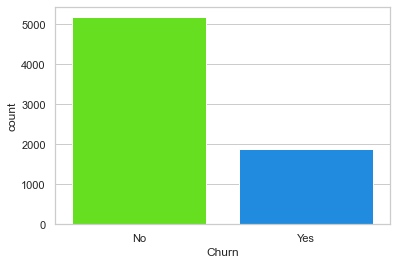

In [18]:
plot1=sns.countplot(x='Churn', palette = "gist_rainbow",data=tc)
plot1
# #Possible values of palette are:
# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r,
# GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r,
# Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r,
# Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1,
# Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr,
# YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r,
# cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth,
# gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, 

array([<AxesSubplot:ylabel='Churn'>], dtype=object)

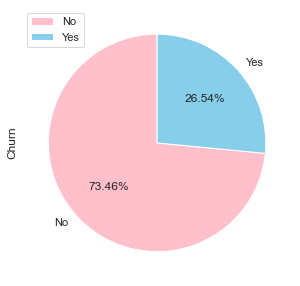

In [19]:

pie_churn=pd.DataFrame(tc['Churn'].value_counts())
pie_churn.plot.pie(subplots=True,labels=pie_churn.index.values,autopct='%1.2f%%',startangle=90,colors=('pink','skyblue'),figsize=(15,5))

#### We have a data with 27% churn rate. 27 % of customers switched to another firm.

## Tenure
The time for which a customer has been using the service.



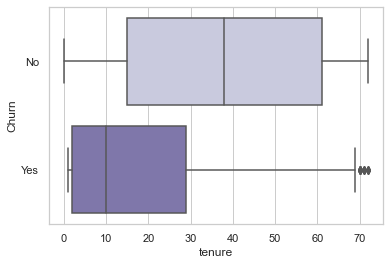

In [20]:
sns.boxplot(x = 'tenure', y = 'Churn', data = tc,palette = "Purples")
plt.show()

#### Customer with more tenure tends to churn less.

### churn vs Phone Service
Whether a customer has a landline phone service along with the internet service.

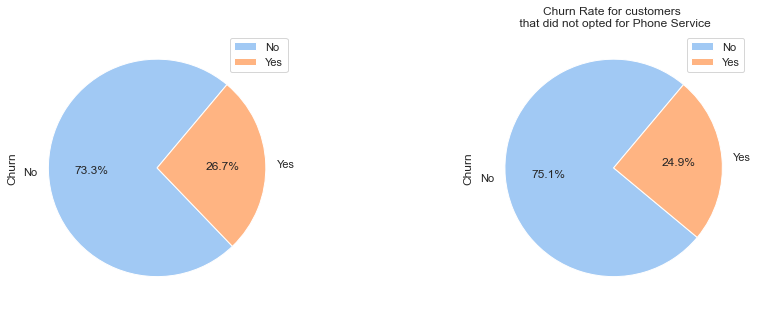

In [21]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
colors = sns.color_palette('pastel')[0:5]
pie_PhoneService_Yes = pd.DataFrame(tc[tc['PhoneService'] == "Yes"]['Churn'].value_counts())
pie_PhoneService_Yes.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, colors=colors,autopct='%1.1f%%',startangle= 50, ax = axs[0])
plt.title('Churn Rate for customers \n opted for Phone Service')
plt.gca().set_aspect('equal')

pie_PhoneService_No = pd.DataFrame(tc[tc['PhoneService'] == "No"]['Churn'].value_counts())
pie_PhoneService_No.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', colors=colors,startangle= 50,ax = axs[1])
plt.title('Churn Rate for customers \n that did not opted for Phone Service')
plt.gca().set_aspect('equal')

plt.show() 

#### Opting for phone service does not have a significant impact on churn rate.

### Churn vs Contract

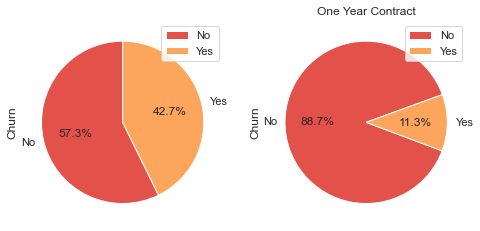

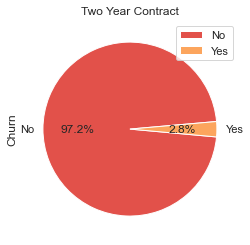

In [22]:
colors = sns.color_palette('Spectral')
fig, axs = plt.subplots(1,2, figsize = (8,5))


pie_Contract_m2m = pd.DataFrame(tc[tc['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%',colors=colors, startangle= 90 ,ax=axs[0])
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(tc[tc['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%',colors=colors, startangle= 20,ax=axs[1])
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(tc[tc['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%',colors=colors, startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

Text(0, 0.5, 'Frequency of churn')

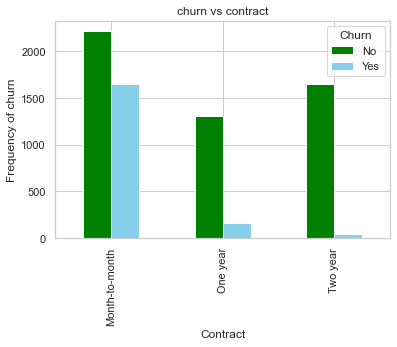

In [23]:
%matplotlib inline
pd.crosstab(tc.Contract,tc.Churn).plot(kind='bar',color=('green','skyblue'))
plt.title('churn vs contract')
plt.xlabel('Contract')
plt.ylabel('Frequency of churn')


#### Customers with One Year and Two year contract change their firm lesser than month to month churn

## InternetService vs Churn

In [24]:
label=['Churn is not Happen','Churn is Happen']
Internet_DSL=tc[tc['InternetService']=='DSL']['Churn'].value_counts()
Internet_Fiber_optic=tc[tc['InternetService']=='Fiber optic']['Churn'].value_counts()
Internet_No=tc[tc['InternetService']=='No']['Churn'].value_counts()
myexplode=[0.1,0]
myexplod=[0,0.1]

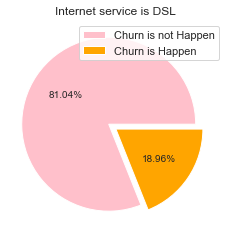

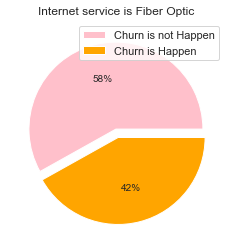

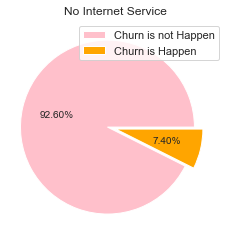

In [25]:
plt.pie(Internet_DSL,colors=('pink','orange'),autopct='%1.2f%%',explode=myexplode)
plt.title('Internet service is DSL')
plt.legend(label,loc=1)
plt.show()

plt.pie(Internet_Fiber_optic,colors=('pink','orange'),autopct='%.0f%%',explode=myexplod)
plt.title('Internet service is Fiber Optic')
plt.legend(label,loc=1)
plt.show()

plt.pie(Internet_No,colors=('pink','orange'),autopct='%1.2f%%',explode=myexplode)
plt.title('No Internet Service')
plt.legend(label,loc=1)
plt.show()

#### In the InternetService there are three categories (DSL, Fiber Optic,No Internet Service) in DSL there is 18.96 percent rate of churn and In fiber optic 42 percent and In No Internet Service there is 7.40 percent rate of churn

### churn vs Paperless Billing

Text(0, 0.5, 'Frequency of churn')

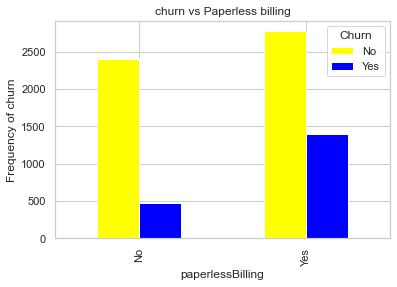

In [26]:
%matplotlib inline
pd.crosstab(tc.PaperlessBilling,tc.Churn).plot(kind='bar',color=('yellow','blue'))
plt.title('churn vs Paperless billing')
plt.xlabel('paperlessBilling')
plt.ylabel('Frequency of churn')

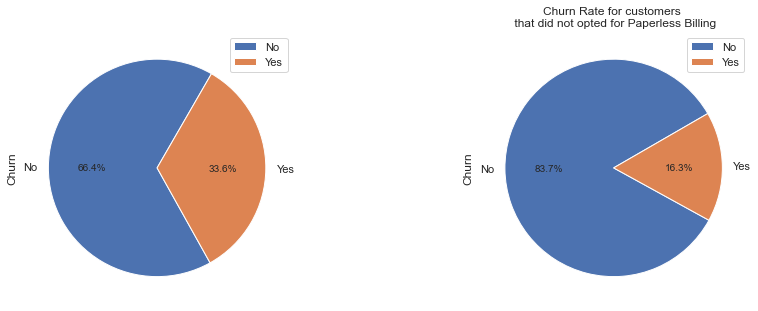

In [27]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
pie_PaperlessBilling_Yes = pd.DataFrame(tc[tc['PaperlessBilling'] == "Yes"]['Churn'].value_counts())
pie_PaperlessBilling_Yes.plot.pie(subplots=True, labels = pie_PaperlessBilling_Yes.index.values, autopct='%1.1f%%', startangle= 60,ax=axs[0])
plt.title('Churn Rate for customers \n opted for Paperless Billing')
plt.gca().set_aspect('equal')


pie_PaperlessBilling_No = pd.DataFrame(tc[tc['PaperlessBilling'] == "No"]['Churn'].value_counts())
pie_PaperlessBilling_No.plot.pie(subplots=True, labels = pie_PaperlessBilling_No.index.values, autopct='%1.1f%%', startangle= 30,ax=axs[1])
plt.title('Churn Rate for customers \n that did not opted for Paperless Billing')
plt.gca().set_aspect('equal')

plt.show()

#### Churn Rate is higher for the customers who choose for paperless billing than the Churn Rate for customers that did not opted for Paperless Billing

## churn vs Payment Method

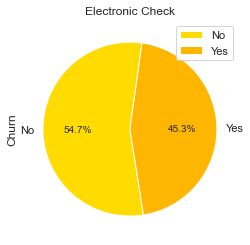

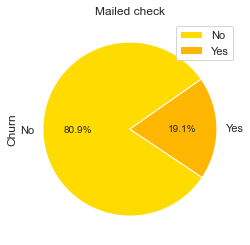

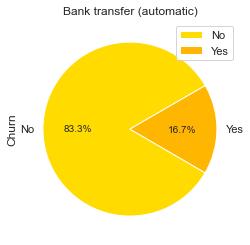

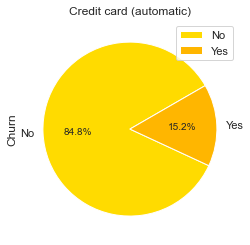

In [28]:
colors = sns.color_palette('autumn_r')

pie_PaymentMethod_ec = pd.DataFrame(tc[tc['PaymentMethod'] == "Electronic check"]['Churn'].value_counts())
pie_PaymentMethod_ec.plot.pie(subplots=True,colors=colors, labels = pie_PaymentMethod_ec.index.values, autopct='%1.1f%%', startangle= 82)
plt.title('Electronic Check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_mc = pd.DataFrame(tc[tc['PaymentMethod'] == "Mailed check"]['Churn'].value_counts())
pie_PaymentMethod_mc.plot.pie(subplots=True,colors=colors, labels = pie_PaymentMethod_mc.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Mailed check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_bta = pd.DataFrame(tc[tc['PaymentMethod'] == "Bank transfer (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_bta.plot.pie(subplots=True,colors=colors, labels = pie_PaymentMethod_bta.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Bank transfer (automatic)')
plt.gca().set_aspect('equal')

pie_PaymentMethod_cca = pd.DataFrame(tc[tc['PaymentMethod'] == "Credit card (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_cca.plot.pie(subplots=True,colors=colors,labels = pie_PaymentMethod_cca.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Credit card (automatic)')
plt.gca().set_aspect('equal')

plt.show()

#### customers with Electronic Check tends to churn more than other payment methods

### Churn vs SeniorCitizen

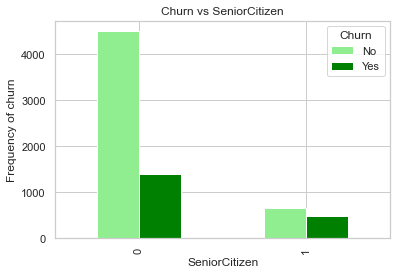

In [29]:
%matplotlib inline
pd.crosstab(tc.SeniorCitizen,tc.Churn).plot(kind='bar',color=("lightgreen","green"))
plt.title('Churn vs SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Frequency of churn')
plt.show()


In [30]:
seniorcitizen_yes=tc[tc['SeniorCitizen']==1]['Churn'].value_counts()
print(seniorcitizen_yes)
seniorcitizen_no=tc[tc['SeniorCitizen']==0]['Churn'].value_counts()
print(seniorcitizen_no)
label=['Churn is not Happen','Churn is Happen']
myexplode=[0,0.1,]

No     666
Yes    476
Name: Churn, dtype: int64
No     4508
Yes    1393
Name: Churn, dtype: int64


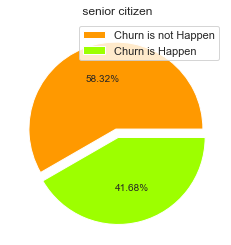

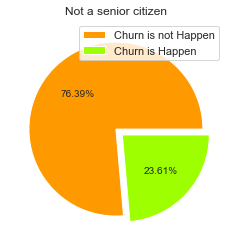

In [31]:
colors=sns.color_palette('gist_rainbow')
%matplotlib inline
plt.pie(seniorcitizen_yes,colors=colors,autopct='%1.2f%%',explode=myexplod)
plt.title(' senior citizen')
plt.legend(label,loc=1)
plt.show()
%matplotlib inline
plt.pie(seniorcitizen_no,colors=colors,autopct='%1.2f%%',explode=myexplode)
plt.title('Not a senior citizen')
plt.legend(label,loc=1)
plt.show()

Total no of customer who is seniorcitizen is less than customer is not seniorcitizen the churn rate in seniorcitizen customer is more than other custome

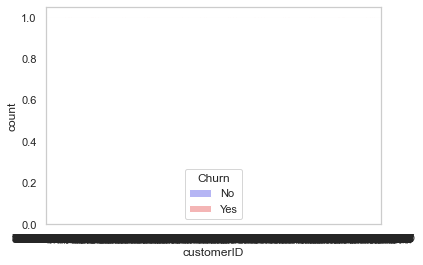

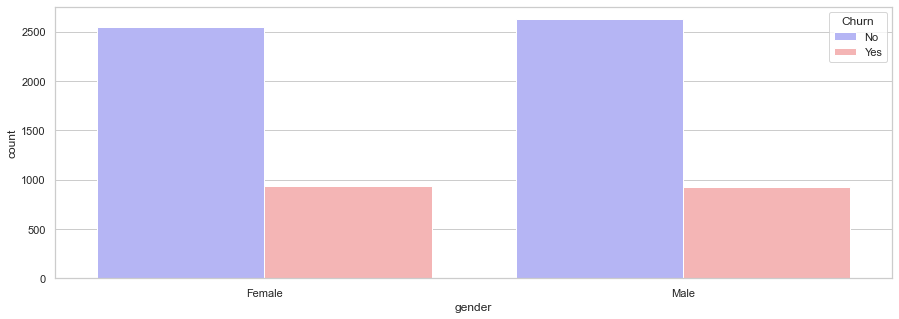

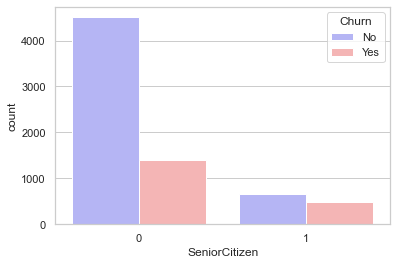

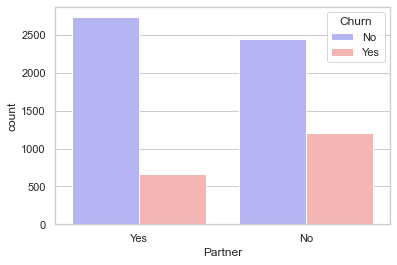

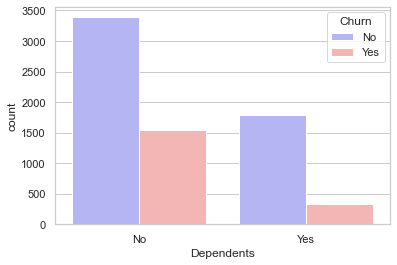

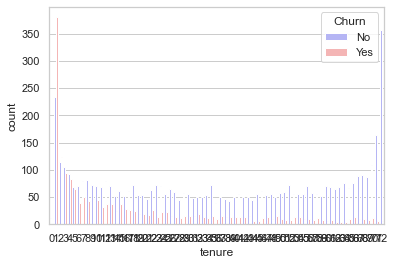

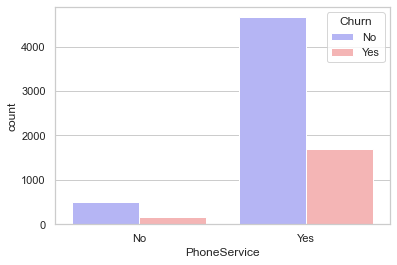

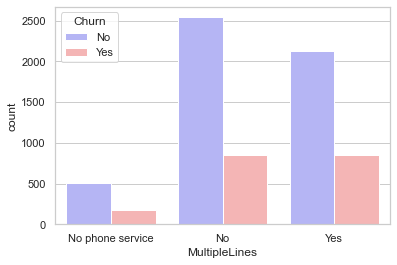

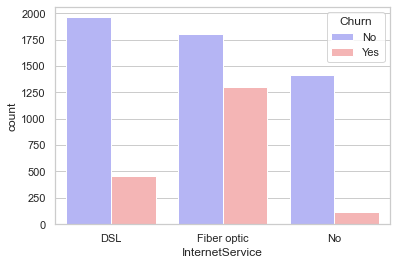

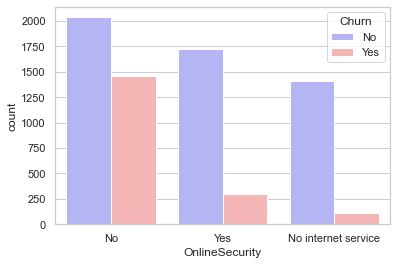

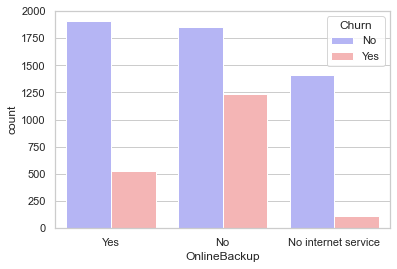

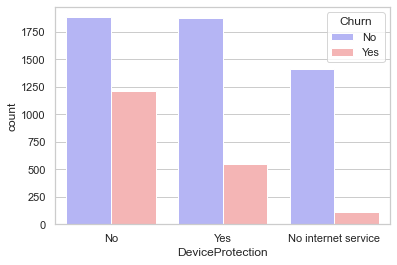

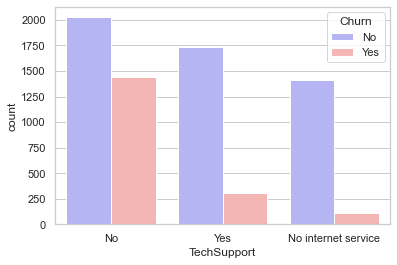

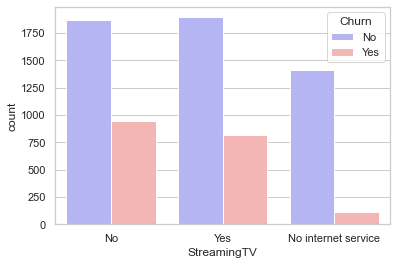

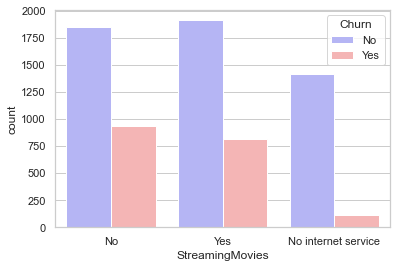

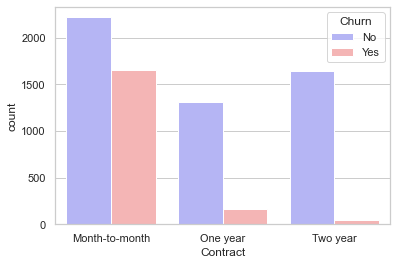

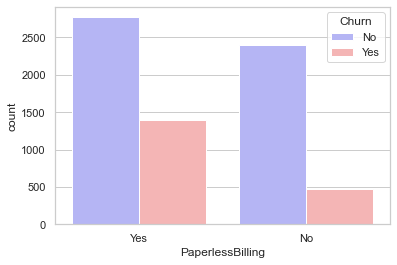

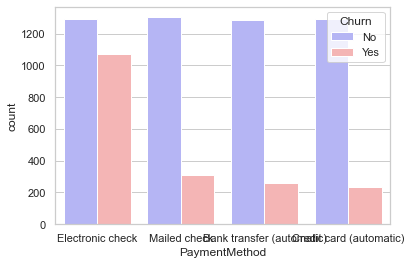

In [32]:
fig = plt.subplots(figsize = (15,5))
for i, predictor in enumerate(tc.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=tc, x=predictor, hue='Churn',palette = "bwr")

### Piechart of dependents

In [33]:
dependents_yes=tc[tc['Dependents']=='Yes']['Churn'].value_counts()
print(dependents_yes)
dependents_no=tc[tc['Dependents']=='No']['Churn'].value_counts()
print(dependents_no)
label=['Churn is not Happen','Churn is Happen']
myexplode=[0,0.1,]

No     1784
Yes     326
Name: Churn, dtype: int64
No     3390
Yes    1543
Name: Churn, dtype: int64


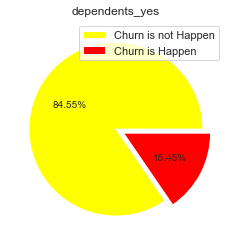

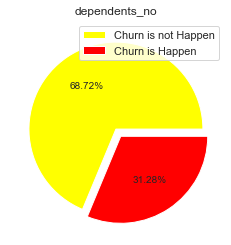

In [34]:
%matplotlib inline
plt.pie(dependents_yes,colors=('yellow','red'),autopct='%1.2f%%',explode=myexplod)
plt.title('dependents_yes')
plt.legend(label,loc=1)
plt.show()
%matplotlib inline
plt.pie(dependents_no,colors=('yellow','red'),autopct='%1.2f%%',explode=myexplode)
plt.title('dependents_no')
plt.legend(label,loc=1)
plt.show()

#### churn rate of customer have dependents is less than customer dont having dependents

#Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

#Customers with no dependents tends to churn more.

#Multiple lines of internet connectivity doesn't effect churn that much.

#Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

#Customers opted for Online Security churn less than who have not opted.

#Customers opted for Online Backup churn less than who have not opted.

#Customers opted for Device Potection churn less than who have not opted.

#Customers opted for Tech Support churn less than who have not opted.

#Streaming TV doesn't make such impact on churning.

#Streaming Movies doesn't make such impact on churning.

Electronic check mediums are the highest churners
Contract Type – Monthly customers are more likely to churn because of no contract terms, as they are free-to-go customers.
No Online security, No Tech Support category are high churners
Non-senior Citizens are high churners

## Model Building
Data Preparation

Converting some binary variables (Yes/No) to 0/1

In [36]:
"""# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
tc[varlist] = tc[varlist].apply(binary_map)"""

In [40]:
#another method for converting variables
tc.Churn.replace({'Yes':1 , 'No':0},inplace=True)

In [43]:
data1=pd.get_dummies(data=tc,columns=['gender','Partner','Dependents','OnlineBackup','StreamingMovies','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod'],drop_first=True)

In [44]:
pd.set_option('display.max_columns',None)

In [45]:
data1

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_1,Dependents_1,OnlineBackup_No internet service,OnlineBackup_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PhoneService_1,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,2234-XADUH,0,72,103.20,7362.90,0,0,1,1,0,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0
7040,4801-JZAZL,0,11,29.60,346.45,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
7041,8361-LTMKD,1,4,74.40,306.60,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [46]:
data1.dtypes

customerID                                object
SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                uint8
Partner_1                                  uint8
Dependents_1                               uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
StreamingMovies_No internet service        uint8
StreamingMovies_Yes                        uint8
PhoneService_1                             uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
DeviceProtection_No 

In [52]:
data1=data1.drop(columns=['customerID'])

SyntaxError: invalid syntax (962747875.py, line 1)

In [50]:
data1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_1,Dependents_1,OnlineBackup_No internet service,OnlineBackup_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PhoneService_1,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,0,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [53]:
data1.corr()['Churn']

SeniorCitizen                            0.150889
tenure                                  -0.352229
MonthlyCharges                           0.193356
TotalCharges                            -0.198324
Churn                                    1.000000
gender_Male                             -0.008612
Partner_1                               -0.150448
Dependents_1                            -0.164221
OnlineBackup_No internet service        -0.227890
OnlineBackup_Yes                        -0.082255
StreamingMovies_No internet service     -0.227890
StreamingMovies_Yes                      0.061382
PhoneService_1                           0.011942
MultipleLines_No phone service          -0.011942
MultipleLines_Yes                        0.040102
InternetService_Fiber optic              0.308020
InternetService_No                      -0.227890
OnlineSecurity_No internet service      -0.227890
OnlineSecurity_Yes                      -0.171226
DeviceProtection_No internet service    -0.227890


In [54]:
x=data1.drop(columns=['Churn','PaymentMethod_Mailed check'])

In [55]:
 y=data1['Churn']     #Target variable

In [57]:
from sklearn.model_selection import train_test_split

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
#StandardScaler. Standardize features by removing the mean and scaling to unit variance. 

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=101)

In [106]:
model=DecisionTreeClassifier(max_depth=5)

In [107]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [108]:
prediction=model.predict(x_test)
prediction

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
from sklearn.metrics import classification_report

In [110]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3089
           1       0.62      0.61      0.62      1137

    accuracy                           0.80      4226
   macro avg       0.74      0.74      0.74      4226
weighted avg       0.79      0.80      0.80      4226



In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
confusion_matrix(y_test,prediction)

array([[930, 111],
       [178, 190]], dtype=int64)

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(y_test,prediction)

0.7960246095598675

In [113]:
model.score(x_train,y_train)

0.8004969826056088

In [115]:
model.score(x_test,y_test)

0.7960246095598675

### Decision Tree

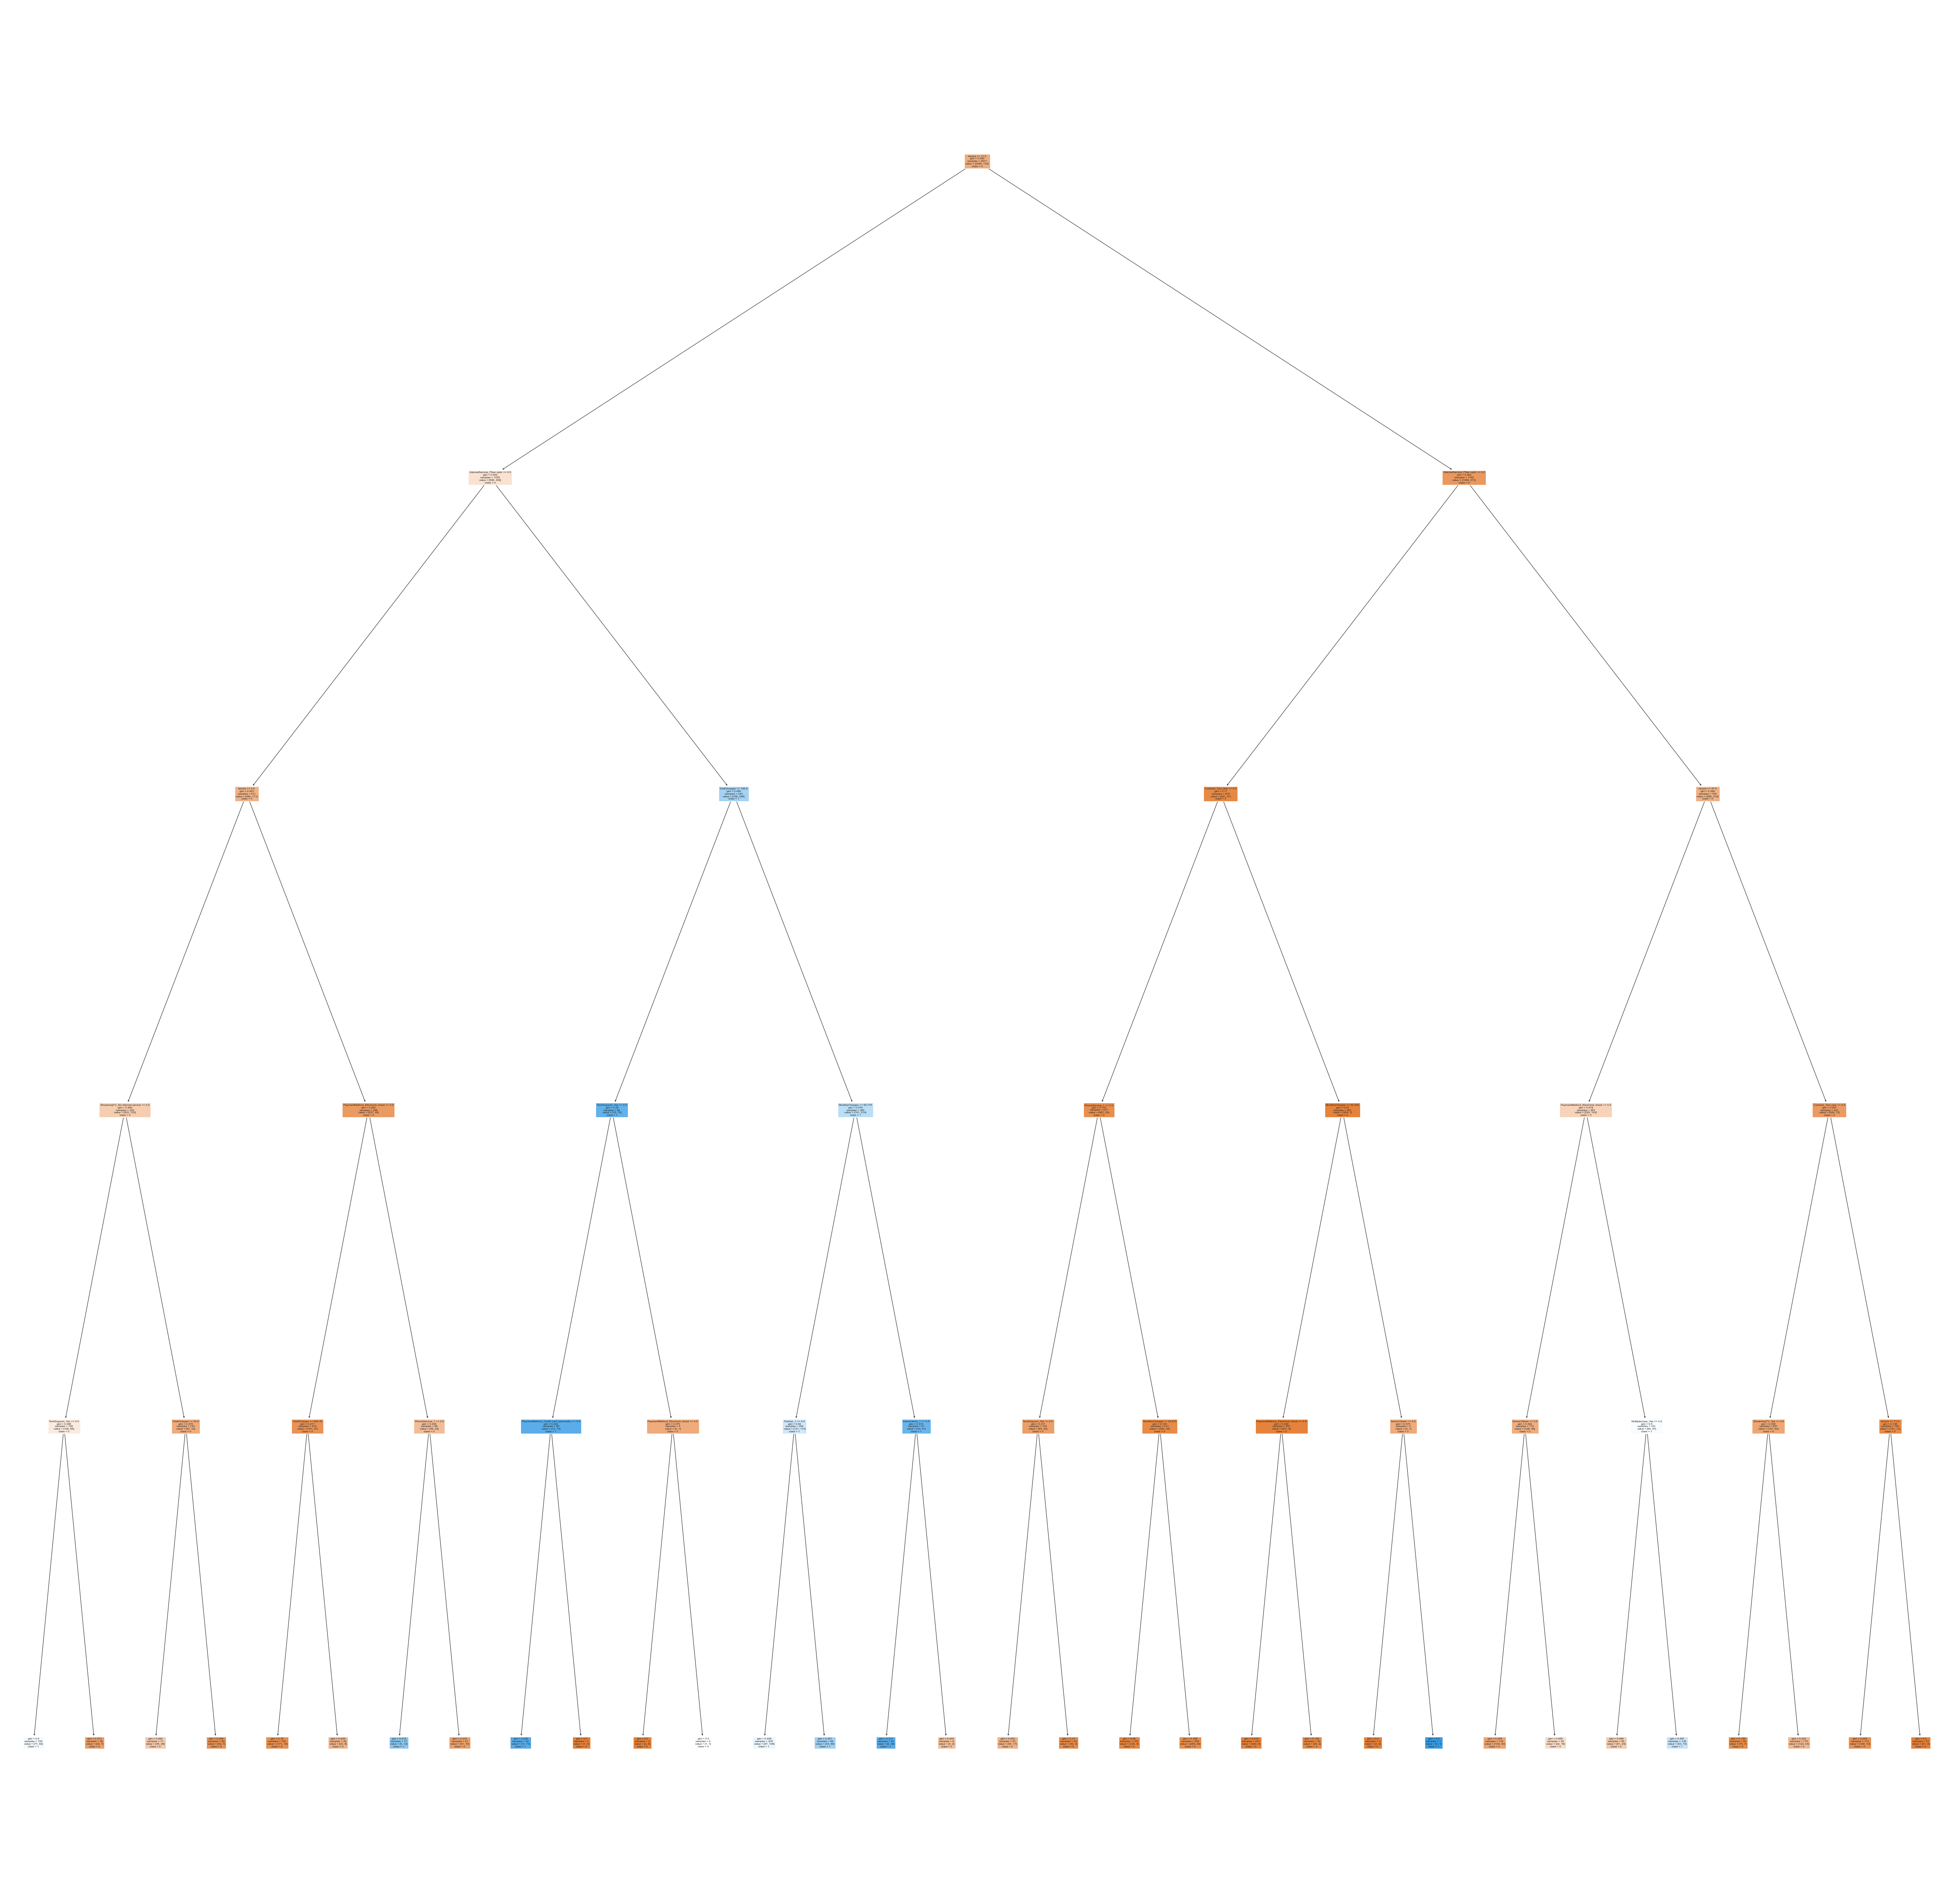

In [116]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80,80))
plot_tree(model,filled=True,feature_names=x_train.columns,class_names=['0','1']);
plt.savefig('tree.png',dpi=400,bbox_inches='tight')
plt.show()